In [1]:
import scipy.io as spio
import numpy as np

lib = spio.loadmat('master_program\Inputs\covis_bathy_2019b.mat')
covis = lib["covis"]
xb = lib["covis"]["grid"][0][0][0]["x"][0]
yb = lib["covis"]["grid"][0][0][0]["y"][0]
zb = lib["covis"]["grid"][0][0][0]["v"][0]
rb = np.sqrt(xb**2 + yb**2)
zb[(rb<4)] = np.NaN



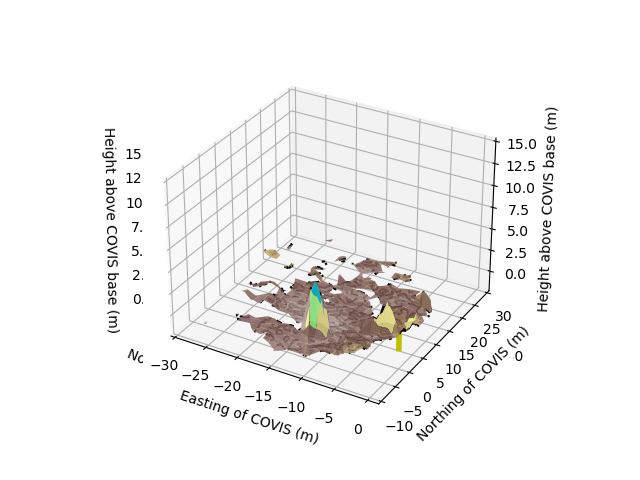

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib ipympl
%matplotlib widget


# Plot 3D image
fig = plt.figure(1)
ax = fig.add_subplot(111, projection=Axes3D.name)
colour = "terrain_r"
color = "pink_r"
# Add bathy
pbathy = ax.plot_surface(xb, yb, zb, cmap=colour, vmin=-2, vmax=4, edgecolor='none', alpha=0.5)
# pbathy.set_cmap(colour)
pbathy.set_edgecolor('none')
pbathy.set_alpha(0.9)

ax.contour3D(xb, yb, zb, levels=np.arange(-2, 4, 0.2), colors="k", linestyles="solid", alpha=1)

# # Set isosurface properties
# isosurfs = [
#     {'color': [77/255, 153/255, 204/255], 'value': -60, 'alpha': 0.1},
#     {'color': [128/255, 77/255, 128/255], 'value': -50, 'alpha': 0.2},
#     {'color': [153/255, 5/255, 13/255], 'value': -40, 'alpha': 0.3}
# ]

# for isosurf in isosurfs:
#     surf_value = isosurf['value']
#     surf_color = isosurf['color']
#     surf_alpha = isosurf['alpha']
#     p = ax.plot_trisurf(xg.flatten(), yg.flatten(), zg.flatten(), cmap='viridis',
#                         vmin=surf_value, vmax=np.max(zb), color=surf_color, alpha=surf_alpha, edgecolor='none')

# Set plot properties
# ax.set_xlim([-20, 1])
# ax.set_ylim([-8, 12])
# ax.set_zlim([-2, 15])

ax.set_xlim([-30, 1])
ax.set_ylim([-10, 30])
ax.set_zlim([-2, 15])

ax.set_xlabel('Easting of COVIS (m)')
ax.set_ylabel('Northing of COVIS (m)')
ax.set_zlabel('Height above COVIS base (m)')

ax.plot3D([0, 0], [0, 0], [0, 4.2], 'y', linewidth=4)
plt.show()
